In [1]:
# 必要なモジュールのインポート
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [2]:
data = load_iris()  # データをロード
X = data.data       # 特徴量
y = data.target     # ラベル

In [3]:
ss = ShuffleSplit(n_splits=1, train_size=0.5, test_size=0.5, random_state=0)
# 分割を1個生成、学習は半分、テストも半分、乱数種（再現用）

In [19]:
clf = linear_model.LogisticRegression(max_iter=1500)  # 識別器を作成

In [20]:
# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X))

X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

In [21]:
clf.fit(X_train, y_train); # 識別器の学習

In [22]:
print(clf.score(X_train, y_train)) # 学習データの精度

0.9777777777777777


In [23]:
print(clf.score(X_test, y_test))  # テストデータの精度

0.9333333333333333


In [24]:
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size =0.5, random_state=0)
                         # 分割を10個生成  # 学習は半分　# テストも半分　# 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(X): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
    y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train) # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)

scores = np.array(scores)
print(scores)

[0.93333333 0.93333333 0.98666667 0.94666667 0.96       0.94666667
 0.97333333 1.         0.96       0.98666667]


In [25]:
scores.mean()

0.9626666666666667

In [26]:
scores.std() # 標準偏差

0.022150996967781538

In [27]:
print("{0} +/- {1}".format(scores.mean(), scores.std()))

0.9626666666666667 +/- 0.022150996967781538


In [28]:
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

96.27 +/- 2.22 %


In [29]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# 学習データの分量を0.1, 0.2, ..., 0.9に
train_sizes = np.arange(0.1, 1.0, 0.1)

In [31]:
all_mean = []
all_std  = []

for train_size in train_sizes:

    ss = ShuffleSplit(n_splits=100, train_size=train_size, test_size=1-train_size)

    scores = []
    for train_index, test_index in ss.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, scores.mean() * 100, scores.std()  * 100))
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

train_size 10%: 86.59 +/- 8.23 %
train_size 20%: 92.73 +/- 4.02 %
train_size 30%: 94.63 +/- 3.18 %
train_size 40%: 95.61 +/- 2.45 %
train_size 50%: 95.39 +/- 2.26 %
train_size 60%: 96.00 +/- 2.44 %
train_size 70%: 96.16 +/- 2.61 %
train_size 80%: 96.67 +/- 3.06 %
train_size 90%: 97.27 +/- 3.66 %


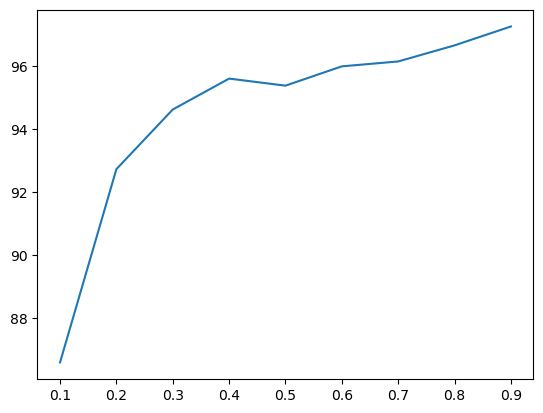

In [32]:
plt.plot(train_sizes, all_mean)
plt.show()

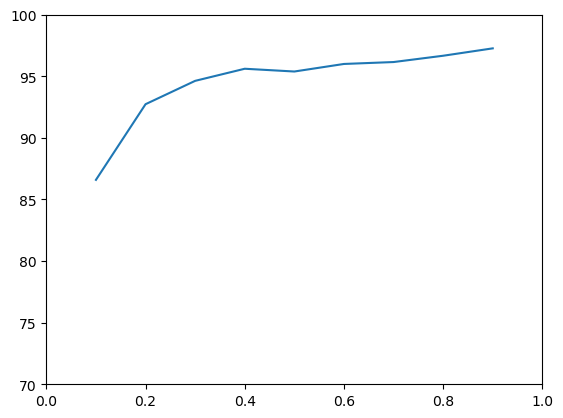

In [33]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)
plt.show()

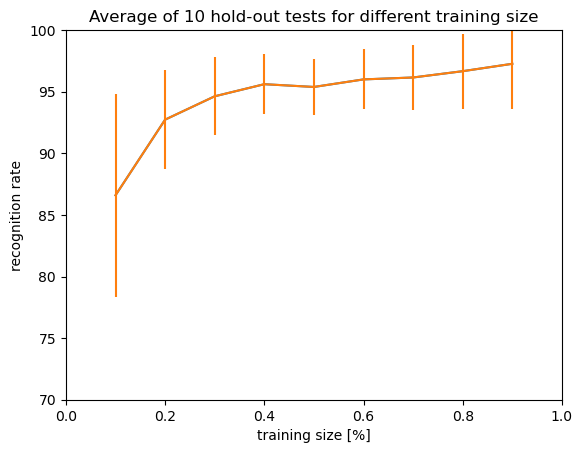

In [34]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")
plt.show()